In [ ]:
#|

In [1]:
from fastai.vision.all import *
from fastdownload import download_url
import gradio as gr

In [2]:
def is_cat(x):
    return x[0].isupper()

def classify_image(img, categories = ("Dog", "Cat")):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [3]:
from fastcore.all import *

def search_images(term, max_images=200):
    url = 'https://duckduckgo.com/'
    res = urlread(url, data={'q':term})
    searchObj = re.search(r'vqd=([\d-]+)\&', res)
    requestUrl = url + 'i.js'
    params = dict(l='us-en', o='json', q=term, vqd=searchObj.group(1), f=',,,', p='1', v7exp='a')
    urls,data = set(),{'next':1}
    while len(urls)<max_images and 'next' in data:
        data = urljson(requestUrl,data=params)
        urls.update(L(data['results']).itemgot('image'))
        requestUrl = url + data['next']
        time.sleep(0.2)
    return L(urls)[:max_images]

In [4]:
download_url(search_images("dog photos", max_images=1)[0], "dog.jpg", show_progress=False)
download_url(search_images("cat photos", max_images=1)[0], "cat.jpg", show_progress=False)
download_url(search_images("bird photos", max_images=1)[0], "bird.jpg", show_progress=False)

Path('bird.jpg')

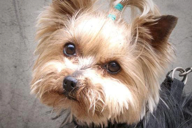

In [5]:
im = PILImage.create("dog.jpg")
im.thumbnail((192,192))
im

In [6]:
learn = load_learner("model.pkl")

In [7]:
learn.predict(im)

('False', TensorBase(0), TensorBase([9.9902e-01, 9.7814e-04]))

In [8]:
%time learn.predict(im)

CPU times: user 251 ms, sys: 0 ns, total: 251 ms
Wall time: 29 ms


('False', TensorBase(0), TensorBase([9.9902e-01, 9.7814e-04]))

High probability that it's a dog (>99.9%) and not a cat (<0.1%).

In [14]:
classify_image(im)

{'Dog': 0.9990218877792358, 'Cat': 0.0009781427215784788}

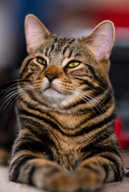

In [15]:
cat_im = PILImage.create("cat.jpg")
cat_im.thumbnail((192,192))
cat_im

In [16]:
classify_image(cat_im)

{'Dog': 1.6030631683205954e-11, 'Cat': 1.0}

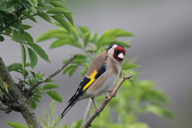

In [17]:
bird_im = PILImage.create("bird.jpg")
bird_im.thumbnail((192,192))
bird_im

In [18]:
classify_image(bird_im)

{'Dog': 0.23519153892993927, 'Cat': 0.7648084759712219}

Hmm, that's not great. It appears the classifier can only go with "dog" or "cat".

In [19]:
image = gr.components.Image(shape=(192,192))
label = gr.components.Label()
examples = ["dog.jpg", "cat.jpg", "bird.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f9dc18735e0>, 'http://127.0.0.1:7860/', None)